In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Deep L/Debt_coll.csv')

In [ ]:
df.head(7)

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,...,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,932,Creditor 1,3677,0.00,"1,160.20","1,160.20",4.22,Other,PAID_IN_FULL,N,...,Cheque,1.0,53.0,0,0,1,NaN,NaN,NaN,NaN
1,160,Creditor 2,4276,182.90,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,Y,...,NaN,1.0,NaN,0,0,1,NaN,NaN,NaN,NaN
2,932,Creditor 1,8525,0.00,538.57,538.57,4.22,Other,PAID_IN_FULL,N,...,Cheque,1.0,NaN,1,0,1,NaN,NaN,NaN,NaN
3,160,Creditor 2,9859,"8,279.50","8,279.50","8,279.50",4.22,Other,PASSIVE,Y,...,NaN,1.0,NaN,1,0,1,NaN,NaN,NaN,NaN
4,932,Creditor 1,12807,0.00,523.00,523.00,4.22,Other,PAID_IN_FULL,Y,...,Cheque,1.0,46.0,2,0,1,NaN,NaN,NaN,NaN
5,932,Creditor 1,13465,"1,118.74",790.30,790.30,4.22,Other,PASSIVE,Y,...,Cheque,1.0,NaN,0,0,1,NaN,NaN,NaN,NaN
6,932,Creditor 1,18664,0.00,71.89,71.89,4.22,Other,PAID_IN_FULL,N,...,Cheque,1.0,50.0,2,0,1,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()/len(df)*100

,0
EntityID,0.000000
OriginalCreditor[Redacted],0.000000
AccountID,0.000000
CurrentBalance,0.000000
DebtLoadPrincipal,0.000000
BalanceAtDebtLoad,0.000000
PurchasePrice,0.662364
ProductOrDebtType,0.000000
CollectionStatus,0.000000
IsStatBarred,0.000000


In [ ]:
df = df.loc[:, df.isnull().mean() < 0.5]

In [ ]:
df.isnull().sum()/len(df)*100

,0
EntityID,0.000000
OriginalCreditor[Redacted],0.000000
AccountID,0.000000
CurrentBalance,0.000000
DebtLoadPrincipal,0.000000
BalanceAtDebtLoad,0.000000
PurchasePrice,0.662364
ProductOrDebtType,0.000000
CollectionStatus,0.000000
IsStatBarred,0.000000


In [ ]:
df.dropna(inplace=True, axis=0)

In [ ]:
df.isnull().sum()/len(df)*100

,0
EntityID,0.0
OriginalCreditor[Redacted],0.0
AccountID,0.0
CurrentBalance,0.0
DebtLoadPrincipal,0.0
BalanceAtDebtLoad,0.0
PurchasePrice,0.0
ProductOrDebtType,0.0
CollectionStatus,0.0
IsStatBarred,0.0


In [ ]:
df.shape

(374544, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374544 entries, 0 to 406422
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EntityID                    374544 non-null  int64  
 1   OriginalCreditor[Redacted]  374544 non-null  object 
 2   AccountID                   374544 non-null  int64  
 3   CurrentBalance              374544 non-null  object 
 4   DebtLoadPrincipal           374544 non-null  object 
 5   BalanceAtDebtLoad           374544 non-null  object 
 6   PurchasePrice               374544 non-null  float64
 7   ProductOrDebtType           374544 non-null  object 
 8   CollectionStatus            374544 non-null  object 
 9   IsStatBarred                374544 non-null  object 
 10  InBankruptcy                374544 non-null  object 
 11  IsLegal                     374544 non-null  object 
 12  NumLiableParties            374544 non-null  float64
 13  CustomerAge        

In [ ]:
df.head(3)

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
0,932,Creditor 1,3677,0.00,"1,160.20","1,160.20",4.22,Other,PAID_IN_FULL,N,N,Y,1.0,53.0,0,0,1
4,932,Creditor 1,12807,0.00,523.00,523.00,4.22,Other,PAID_IN_FULL,Y,N,Y,1.0,46.0,2,0,1
6,932,Creditor 1,18664,0.00,71.89,71.89,4.22,Other,PAID_IN_FULL,N,N,Y,1.0,50.0,2,0,1


In [ ]:
columns_to_convert = ['CurrentBalance', 'DebtLoadPrincipal', 'BalanceAtDebtLoad']

In [ ]:
for column in columns_to_convert:
    df[column] = df[column].str.replace(',', '').astype(float)

In [ ]:
# converting negative age to positive

df['CustomerAge'] = df['CustomerAge'].abs()

In [ ]:
# dropping insignificant columns for our analysis

df = df.drop(['EntityID', 'AccountID', 'OriginalCreditor[Redacted]'], axis = 1 )

In [ ]:
# seperating columns on basis of dataypes and putting in a list

obj1 = []
int1 = []
flo1 = []

for i in df.columns:
    if df[i].dtypes == 'object':
        obj1.append(i)
    elif df[i].dtypes == 'int64':
        int1.append(i)
    elif df[i].dtypes == 'float':
        flo1.append(i)

In [ ]:
# renaming column

df.rename(columns={'CurrentBalance': 'Debt_Pending'}, inplace=True)

In [ ]:
#dropping columns

df = df.drop(['Debt_Pending', 'DebtLoadPrincipal', 'InBankruptcy', 'IsLegal'], axis = 1 )

In [ ]:
# mapping values for statue barred column

df['IsStatBarred'] = df['IsStatBarred'].map({'Y': 1, 'N': 0})

In [ ]:
categorical_features = ['ProductOrDebtType', 'CollectionStatus']

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df.head(3)

,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
0,1160.20,4.22,5,7,0,1.0,53.0,0,0,1
4,523.00,4.22,5,7,1,1.0,46.0,2,0,1
6,71.89,4.22,5,7,0,1.0,50.0,2,0,1


In [ ]:
y = df['IsStatBarred'].astype(int)  # Target variable
X = df.drop(columns=['IsStatBarred']).astype(int)  # Features

In [ ]:
print(X.shape)
print(y.shape)

(374544, 9)
(374544,)


In [ ]:
x = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train)
print(X_test)

[[4.73741122e-06 5.76923077e-02 1.00000000e+00 ... 2.50000000e-01
  0.00000000e+00 1.66666667e-01]
 [1.23741181e-02 1.73076923e-01 1.11111111e-01 ... 1.25000000e-01
  0.00000000e+00 1.66666667e-01]
 [6.73896746e-04 5.76923077e-02 7.77777778e-01 ... 1.25000000e-01
  2.00000000e-01 1.66666667e-01]
 ...
 [2.36870561e-06 5.76923077e-02 1.00000000e+00 ... 1.25000000e-01
  2.00000000e-01 1.66666667e-01]
 [5.59014524e-04 5.76923077e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.66666667e-01]
 [8.74052370e-04 2.11538462e-01 5.55555556e-01 ... 0.00000000e+00
  0.00000000e+00 1.66666667e-01]]
[[1.33713432e-03 5.76923077e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.66666667e-01]
 [1.83574685e-04 5.76923077e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.66666667e-01]
 [1.68178098e-04 5.76923077e-02 1.00000000e+00 ... 1.25000000e-01
  0.00000000e+00 1.66666667e-01]
 ...
 [2.39594572e-03 5.76923077e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.66666667e-01]

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(layers.Dense(500, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(250, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 500)                 │           5,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             251 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,501 (509.77 KB)

 Trainable params: 130,501 (509.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=16, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/16
7491/7491 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.8844 - loss: 0.2849 - val_accuracy: 0.9471 - val_loss: 0.1451
Epoch 2/16
7491/7491 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9458 - loss: 0.1459 - val_accuracy: 0.9496 - val_loss: 0.1362
Epoch 3/16
7491/7491 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9475 - loss: 0.1413 - val_accuracy: 0.9507 - val_loss: 0.1349
Epoch 4/16
7491/7491 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9489 - loss: 0.1387 - val_accuracy: 0.9511 - val_loss: 0.1420
Epoch 5/16
7491/7491 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9485 - loss: 0.1387 - val_accuracy: 0.9520 - val_loss: 0.1310
Epoch 6/16
7491/7491 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9503 - loss: 0.1353 - val_accuracy: 0.9518 - val_loss: 0.1335
Epoch 7/16
7491/7491 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9507 - loss: 0.1354 - val_accuracy: 0.9524 - val_loss: 0.1322
Epoch 8/16
7491/7491 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9511 - loss: 0

In [ ]:
score, acc = model.evaluate(X_train, y_train,batch_size=32)
print('Train score', score)
print('Train accuracy', acc)

9364/9364 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9555 - loss: 0.1224
Train score 0.12276314944028854
Train accuracy 0.9550352692604065


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

2341/2341 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

accuracy_score(y_test,y_pred)

0.9540108665180419

Text(0.5, 23.52222222222222, 'Prediction label')

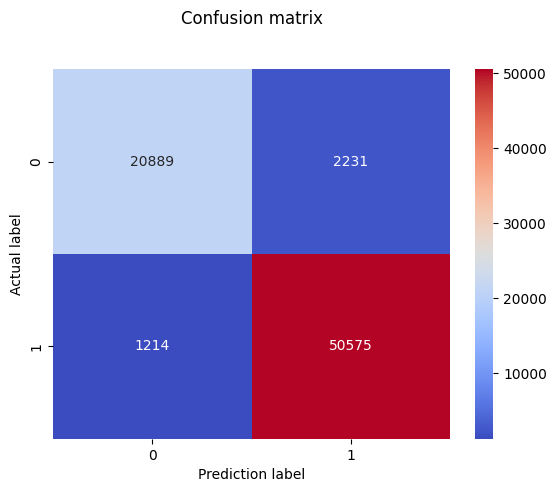

In [ ]:
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, fmt='g', cmap='coolwarm')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Prediction label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92     23120
           1       0.96      0.98      0.97     51789

    accuracy                           0.95     74909
   macro avg       0.95      0.94      0.95     74909
weighted avg       0.95      0.95      0.95     74909



2341/2341 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


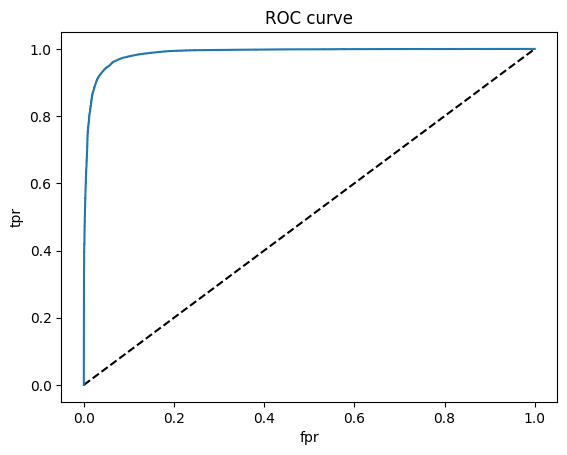

In [ ]:
from sklearn.metrics import roc_curve

# Predict probabilities using the model
y_pred_proba = model.predict(X_test)

# Assuming y_test is binary (0 and 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
x_test_reshaped = X_test[5].reshape(1, -1)
result = model.predict(x_test_reshaped)
(result > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


array([[1]])

In [ ]:
X.columns

Index(['BalanceAtDebtLoad', 'PurchasePrice', 'ProductOrDebtType',
       'CollectionStatus', 'NumLiableParties', 'CustomerAge', 'NumPhones',
       'NumEmails', 'NumAddresses'],
      dtype='object')

In [ ]:
lst = ['BalanceAtDebtLoad', 'PurchasePrice', 'ProductOrDebtType',
       'CollectionStatus', 'NumLiableParties', 'CustomerAge', 'NumPhones',
       'NumEmails', 'NumAddresses']

In [ ]:
def pred(lst):
    features = np.array(lst)
    features = features.reshape(1, -1)  # Reshape to (1, input_dim)
    result = model.predict(features)
    result = (result > 0.5).astype(int)
    return result

In [ ]:
X.head(3)

,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
0,1160,4,5,7,1,53,0,0,1
4,523,4,5,7,1,46,2,0,1
6,71,4,5,7,1,50,2,0,1


In [ ]:
BalanceAtDebtLoad = 1160
PurchasePrice = 4
ProductOrDebtType = 5
CollectionStatus = 7
NumLiableParties = 1
CustomerAge = 53
NumPhones = 0
NumEmails = 0
NumAddresses = 1
a = [BalanceAtDebtLoad, PurchasePrice, ProductOrDebtType,
CollectionStatus, NumLiableParties, CustomerAge, NumPhones,
NumEmails, NumAddresses]
result = pred(a)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
[[1]]


In [ ]:
if result == 1:
    print("Y")
else:
    print("N")

Y


In [ ]:
BalanceAtDebtLoad = 523
PurchasePrice = 4
ProductOrDebtType = 5
CollectionStatus = 7
NumLiableParties = 1
CustomerAge = 46
NumPhones = 2
NumEmails = 0
NumAddresses = 1
a = [BalanceAtDebtLoad, PurchasePrice, ProductOrDebtType,
CollectionStatus, NumLiableParties, CustomerAge, NumPhones,
NumEmails, NumAddresses]
result = pred(a)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[1]]


In [ ]:
if result == 1:
    print("Y")
else:
    print("N")

Y
